In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
df = pd.read_csv('petrol_consumption.csv')

#### Going through first five rows of data frame

In [6]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [7]:
df.shape

(48, 5)

##### Summary of data frame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


##### Comment

- The dataset contain 48 rows and 5 columns
- Dataset contains only numerical variables and they are int64 and float64 data type
- There are no missing values
- Petrol_Consumption is the target variable

##### Statistical properties of dataset

In [9]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


- Seems that there are no some outliers in paved_highways

#### Univariate Analysis

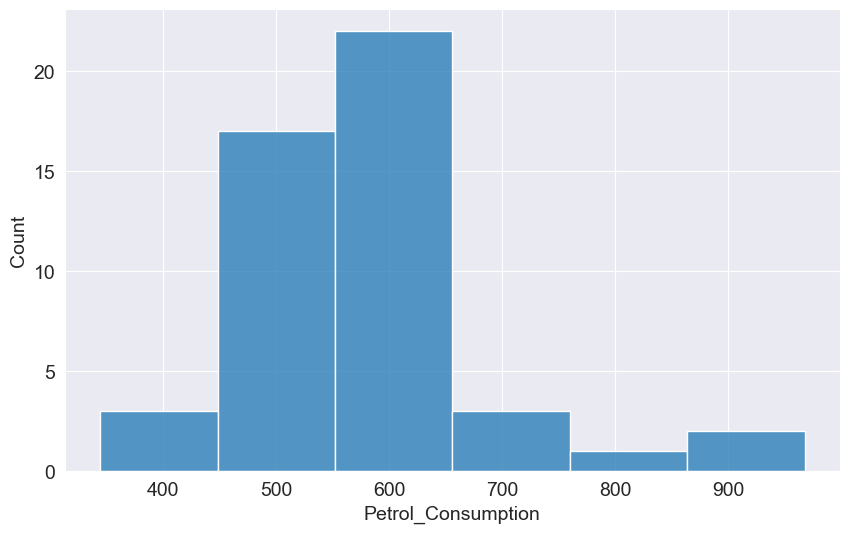

In [12]:
sns.histplot(data = df, x = 'Petrol_Consumption', bins=6)
plt.show()

#### Analysing numerical columns

###### Outliers in numerical variables

In [13]:
df_numeric = df.drop(['Petrol_Consumption'], axis =1)

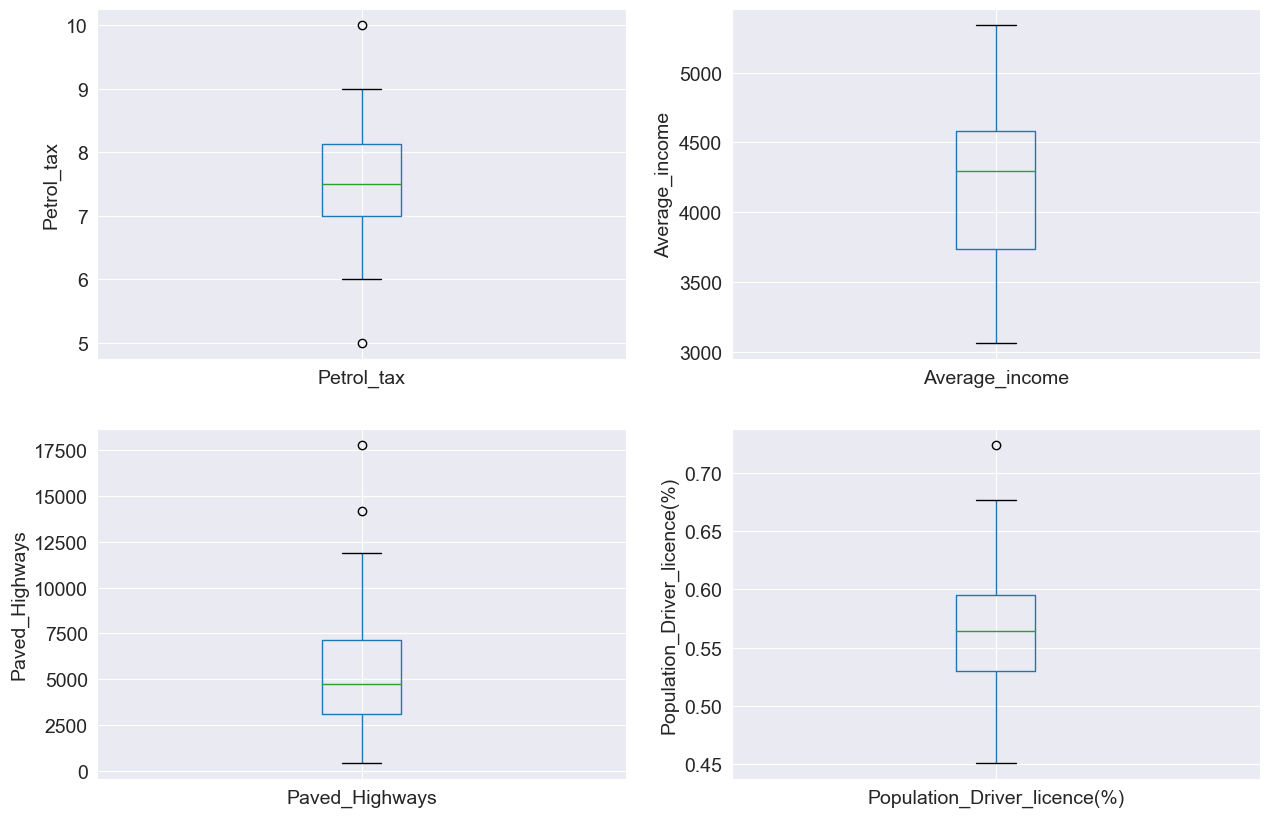

In [14]:
plt.figure(figsize=(15,10))
n=1
for feature in df_numeric.columns :
    plt.subplot(2, 2, n)
    fig = df.boxplot(column= feature)
    fig.set_title('')
    fig.set_ylabel(feature)
    n+=1

- The above boxplot confirms that there are some outliers in the variables

##### Check the distribution of variables

- Plot a histogram to check the distribution to find out if they are normal or skewed

In [15]:
df_numeric.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'],
      dtype='object')

Text(0, 0.5, 'Petrol_Consumption')

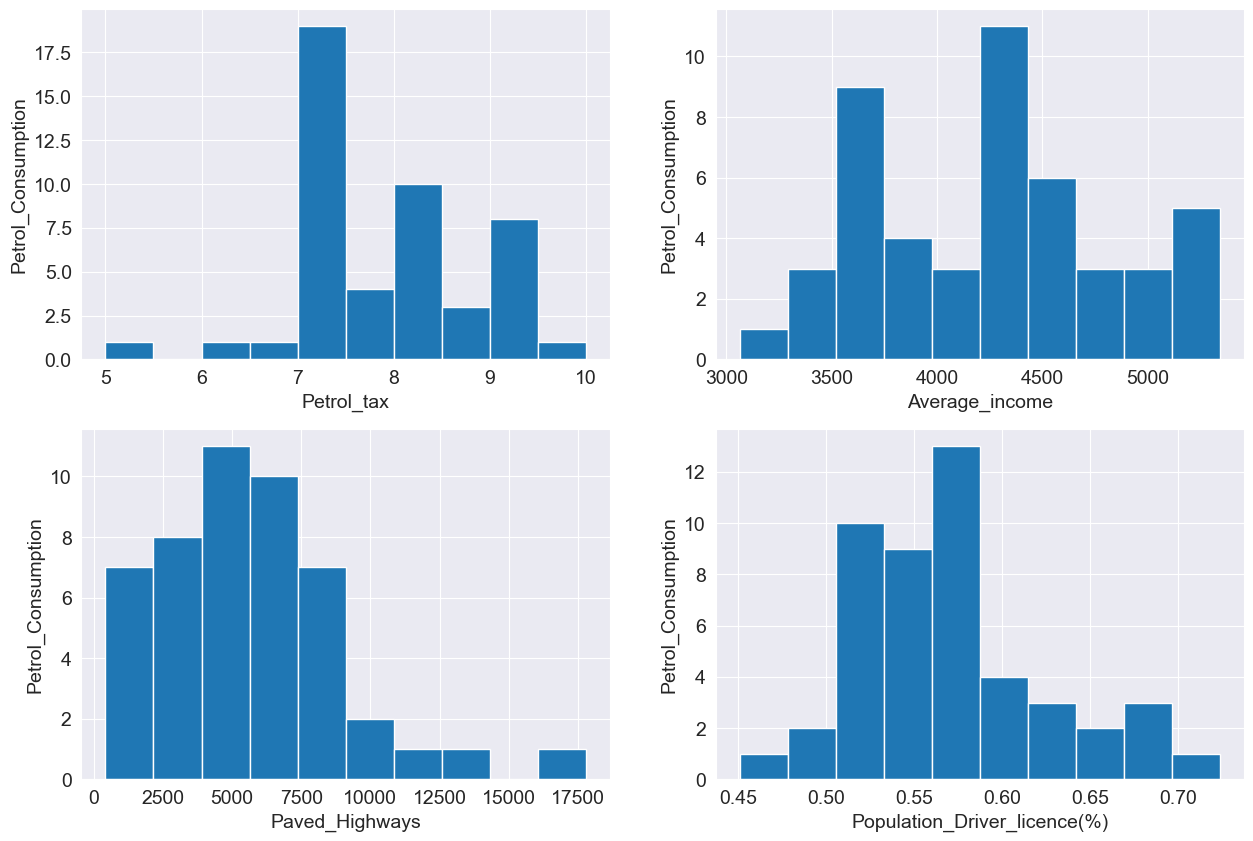

In [17]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Petrol_tax.hist(bins=10)
fig.set_xlabel('Petrol_tax')
fig.set_ylabel('Petrol_Consumption')


plt.subplot(2, 2, 2)
fig = df.Average_income.hist(bins=10)
fig.set_xlabel('Average_income')
fig.set_ylabel('Petrol_Consumption')



plt.subplot(2, 2, 3)
fig = df.Paved_Highways.hist(bins=10)
fig.set_xlabel('Paved_Highways')
fig.set_ylabel('Petrol_Consumption')


plt.subplot(2, 2, 4)
fig = df['Population_Driver_licence(%)'].hist(bins=10)
fig.set_xlabel('Population_Driver_licence(%)')
fig.set_ylabel('Petrol_Consumption')

Using the interquantile range to find outliers

In [21]:
# find outliers for Petrol_tax variable

IQR = df.Petrol_tax.quantile(0.75) - df.Petrol_tax.quantile(0.25)
Lower_fence = df.Petrol_tax.quantile(0.25) - (1.5 * IQR)
Upper_fence = df.Petrol_tax.quantile(0.75) + (1.5 * IQR)
print('Petrol_tax outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
print('Petrol_tax the min value {lowerboundary} and max value {upperboundary}'.format(lowerboundary=df.Petrol_tax.min(), upperboundary=df.Petrol_tax.max()))

Petrol_tax outliers are values < 5.3125 or > 9.8125
Petrol_tax the min value 5.0 and max value 10.0


In [22]:
# find outliers for Average_income variable

IQR = df.Average_income.quantile(0.75) - df.Average_income.quantile(0.25)
Lower_fence = df.Average_income.quantile(0.25) - (1.5 * IQR)
Upper_fence = df.Average_income.quantile(0.75) + (1.5 * IQR)
print('Average_income outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
print('Average_income the min value {lowerboundary} and max value {upperboundary}'.format(lowerboundary=df.Average_income.min(), upperboundary=df.Average_income.max()))

Average_income outliers are values < 2479.375 or > 5838.375
Average_income the min value 3063 and max value 5342


In [23]:
# find outliers for Paved_Highways variable

IQR = df.Paved_Highways.quantile(0.75) - df.Paved_Highways.quantile(0.25)
Lower_fence = df.Paved_Highways.quantile(0.25) - (1.5 * IQR)
Upper_fence = df.Paved_Highways.quantile(0.75) + (1.5 * IQR)
print('Paved_Highways outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
print('Paved_Highways the min value {lowerboundary} and max value {upperboundary}'.format(lowerboundary=df.Paved_Highways.min(), upperboundary=df.Paved_Highways.max()))

Paved_Highways outliers are values < -2958.375 or > 13224.625
Paved_Highways the min value 431 and max value 17782


In [24]:
# find outliers for Paved_Highways variable

IQR = df['Population_Driver_licence(%)'].quantile(0.75) - df['Population_Driver_licence(%)'].quantile(0.25)
Lower_fence = df['Population_Driver_licence(%)'].quantile(0.25) - (1.5 * IQR)
Upper_fence = df['Population_Driver_licence(%)'].quantile(0.75) + (1.5 * IQR)
print('Population_Driver_licence(%) outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
print('Population_Driver_licence(%) the min value {lowerboundary} and max value {upperboundary}'.format(lowerboundary=df['Population_Driver_licence(%)'].min(), upperboundary=df['Population_Driver_licence(%)'].max()))

Population_Driver_licence(%) outliers are values < 0.4315000000000002 or > 0.6934999999999998
Population_Driver_licence(%) the min value 0.451 and max value 0.724


### Bivariate Analysis

In [25]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

To understand the spread of datapoints regplot plotted

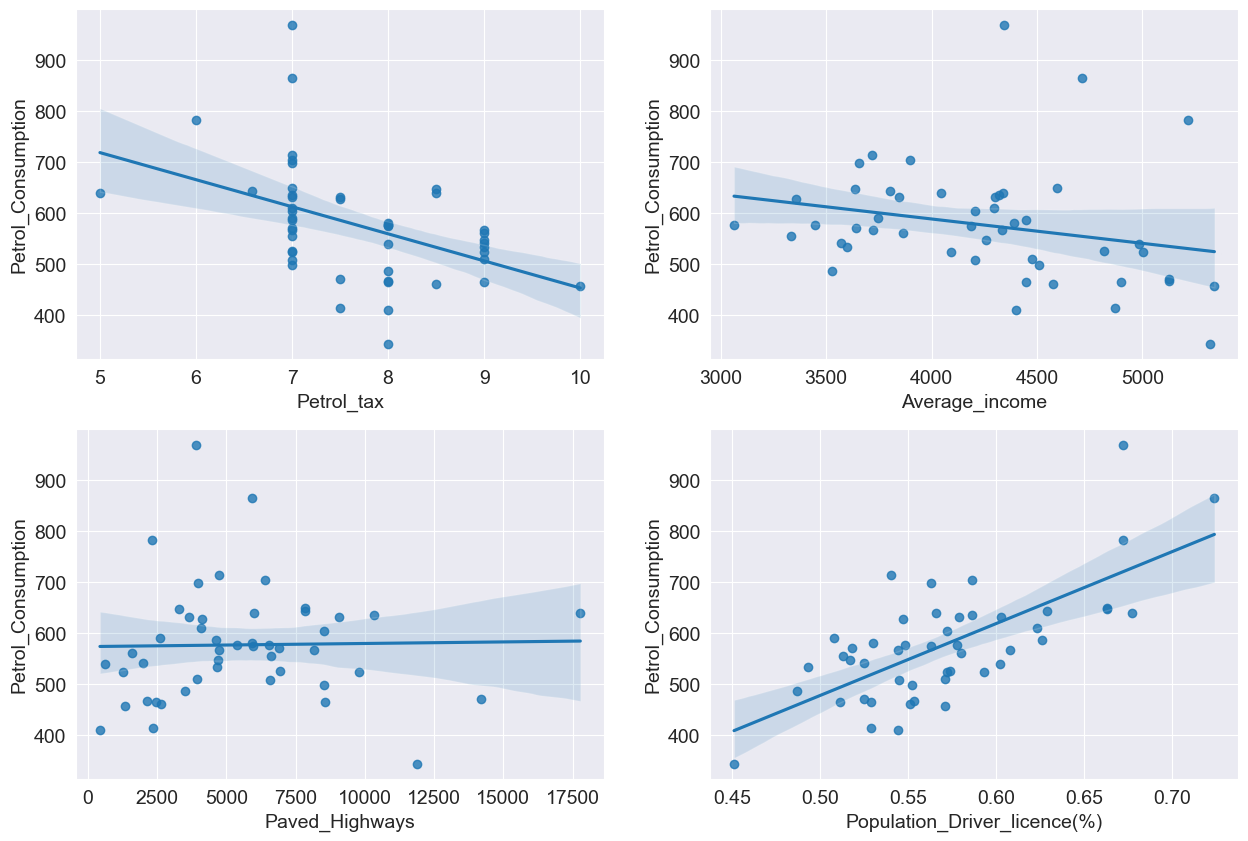

In [33]:
plt.figure(figsize=(15,10))
n=1
for feature in df_numeric.columns :
    plt.subplot(2, 2, n)
    sns.regplot(data = df, x= feature, y= 'Petrol_Consumption' )
    fig.set_title(feature)
    fig.set_ylabel(feature)
    n+=1


### Correlation Chart

In [29]:
corr = df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


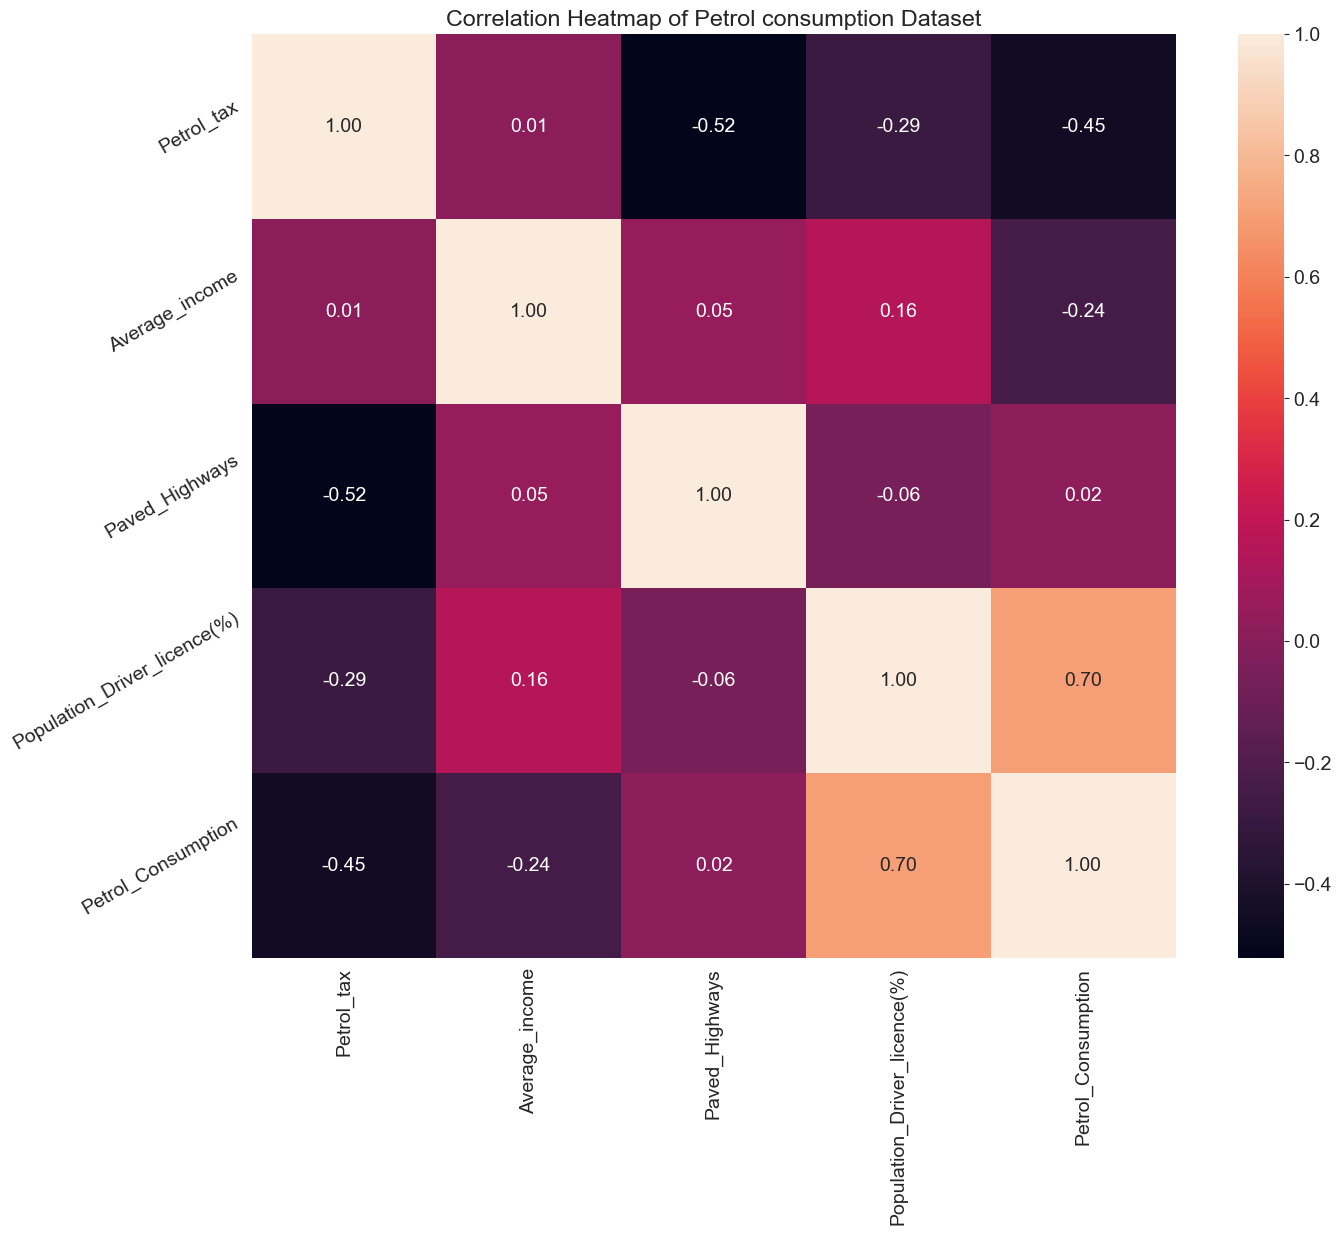

In [32]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Petrol consumption Dataset')
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

#### Splitting data for model training

In [35]:
# creating feature and target 
X = df.drop(['Petrol_Consumption'], axis=1)
y = df['Petrol_Consumption']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size =0.3)

###### Apply Decision Tree algorithm for regression

In [38]:
# Import Decision Tree Regressor and fit the model

from sklearn.tree import DecisionTreeRegressor

In [39]:
tree = DecisionTreeRegressor(max_depth = 4, max_features =4)

In [40]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features=4)

In [41]:
predictions = tree.predict(X_test)

In [42]:
df_pred = pd.DataFrame({'Actual' :y_test, 'Predicted' :predictions})
df_pred.head()

,Actual,Predicted
33,628,533.00
23,547,533.00
38,648,533.00
36,640,690.25
2,561,533.00


Evaluating the predicted accuracy

In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2_score:', metrics.r2_score(y_test,predictions))

Mean Absolute Error: 69.91944444444444
Mean Squared Error: 10702.546180555555
Root Mean Squared Error: 103.4531110240555
r2_score: -0.5974309806158147


Feature Importants

In [45]:
tree.feature_importances_
pd.Series(tree.feature_importances_,index=X.columns).sort_values(ascending=False)

Population_Driver_licence(%)    0.629420
Petrol_tax                      0.228006
Average_income                  0.137082
Paved_Highways                  0.005491
dtype: float64

#### Using Gridsearch & Cross Validation 



###### Use grid search cv to find the optimal value of hyper parameters to plot the Decision Tree


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = [{"max_depth":[3,4,5, None], "max_features":[3,4,5,6,7]}]

In [53]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),param_grid = param_grid,cv=10)

In [55]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7]}])

In [56]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': 6},
 {'max_depth': 3, 'max_features': 7},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': 6},
 {'max_depth': 4, 'max_features': 7},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': 6},
 {'max_depth': 5, 'max_features': 7},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': 6},
 {'max_depth': None, 'max_features': 7}]

In [57]:
gs.cv_results_['rank_test_score']

array([10, 11, 11, 11, 11,  5,  6,  6,  6,  6, 16,  1,  1,  1,  1, 15, 17,
       17, 17, 17])

In [58]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=4, random_state=123)

In [60]:
tree = DecisionTreeRegressor(max_depth=5,max_features=4)

In [61]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=4)

In [62]:
predictions1 = tree.predict(X_test)

In [64]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions1})
df.head(5) #Check the top 5 predictions and actual values.

,Actual,Predicted
33,628,537.5
23,547,537.5
38,648,537.5
36,640,644.0
2,561,524.0


In [66]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('r2_score:', metrics.r2_score(y_test,predictions1))

Mean Absolute Error: 62.36666666666667
Mean Squared Error: 8121.341156462585
Root Mean Squared Error: 90.11848398892751
r2_score: -0.21216781022197617


In [69]:
DT_Regressor=[['Max_Depth',4,5],['Max_Feature',4,4],['Mean Abs. Error',69.92,62.37],['Mean Square Error',10702.55,8121.34],['Root Mean Square',103.45,90.12],['r2_Score',-0.6,-0.21]]
Result_Summary2= pd.DataFrame(DT_Regressor, columns = ['Parameters','Without Grid Search','With Grid Search'])
Result_Summary2

,Parameters,Without Grid Search,With Grid Search
0,Max_Depth,4.00,5.00
1,Max_Feature,4.00,4.00
2,Mean Abs. Error,69.92,62.37
3,Mean Square Error,10702.55,8121.34
4,Root Mean Square,103.45,90.12
5,r2_Score,-0.60,-0.21
